# Packages

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install langdetect

     |████████████████████████████████| 981 kB 3.7 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=2290fc1b8c4d22be46308ae85ba2dda13686bcafbc8cf4f66f76bed15c8f214f
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
import nltk
nltk.download("all")

In [79]:
# images
from IPython.display import Image
# analysis and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# regex
import re
# NLP libraries
#scikit-learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
#nltk
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, TweetTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem.snowball import SnowballStemmer # for non-english stemming
# gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
# spacy
import spacy #used for NER
# NLP misc
from textblob import TextBlob #used for sentiment identification
from wordcloud import WordCloud, STOPWORDS # creating wordclouds
from langdetect import detect_langs # function for detecting languages with a probabilistic outcome
# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Datasets

In [5]:
path = 'gdrive/My Drive/Colab Notebooks/nlp/'

In [6]:
reviews = pd.read_csv(path+'data/amazon_reviews_sample.csv')
movies = pd.read_csv(path+'data/IMDB_sample.csv')
text_tweets = pd.read_csv(path+'data/Tweets.csv')
#articles = open(path+'data/articles.txt','r')

In [ ]:
# drop row if negative reason col has NaN
text_tweets.dropna(subset=['negativereason'],inplace=True)

- **`reviews`** : It contains two columns. The first one is called score and it is 0 when the review is negative, and 1 when it is positive. The second column is called review and it contains the text of the review that a customer wrote

- **`Text_tweets`** :In some situations, you might have more than one text column in a dataset and you might want to create a numeric representation for each of the text columns. Here, besides the text column, which contains the body of the tweet, there is a second text column, called negativereason. It contains the reason the customer left a negative review.

# Regular expressions (Regex)


Regular expressions are a string containing the combination of normal characters and metacharacters (e.g. **`\W, \s, \d`** etc) that describes patterns with the purpose of finding text or positions within a text. RegEX are used for <b>finding and replacing</b> parts of strings as well as **validating** formats such as passwords or emails. 



The **`re`**  module is used in python to deal with RegEx  . Using `r` at the beginning indicated a **raw string.**


### **Metacharacters**
1.	`\d` : digit <br>
`\D` : non-digit
2.	`\s` : white space (forms of whitespace: tabs, space or new line) <br>
`\S` : non-white space (e.i. any non-space character)
3.	`\w` : word (digit or normal character) <br>
`\W` : non-word (e.i. any non-word)
4.	`.`  matches **any character**
5.	`^` : matches only the matching pattern from the beginning of the string
6.	`$` : matches only the matching pattern from the end of the string
7.	`|` : is used as the logical *OR*. It matches everything from the L to everything from the R that why we can use `()` with `|` Example: `r"\d+\s\(cat|dog|bird)"`)
8.	`[]` is used as the logical *OR* as well.
9.	`[0-9]` : matches **any number**
10.	 `[#$%&]` : matches **any special character**
11.	`[a-zA-Z ]`: matches **any small letter and capital letter** respectively
12.	`\` : is used when we want to use a metacharacter as a normal character. E.g. whitespace, **.** , +, -, $, ^, | , comma(,)

 We have to use `\` before the character as seen in the example below. Also use `\` when we want to use `()` in the string e.g. `\(some text\)`


## Regex Methods

Find all matches: Using the syntax   we can match a pattern to a string and get a list with all the matches.

Splitting a string: Using the syntax   we can split any string into substrings at the specified split character and get a list with all the substrings.

Replacing a string: Using the syntax   we can match a pattern to a string and replace it.

### Difference between `re.search()` and `re.match()`

`re.match()` : It is better used when we want to match from the **beginning** of the string and are exact about the composition of the string.

`re.search()` : Searches for the pattern regardless if its in the beggining or middle.

In [ ]:
re.match()

## Quantifiers

### Greedy and non-greedy Quantifiers

## Capturing Groups

# Word Clouds

Word clouds can be useful quick visual representations that allow for identifying words that we want to remove before transforming the data.

In [ ]:
# concat all strings in the Series into a single string
long_tweet = text_tweets.text.str.cat(sep=' ')

Wordcloud before removing any words

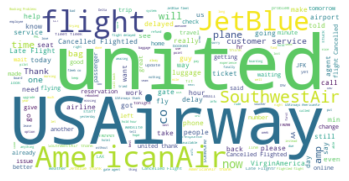

In [ ]:
# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white').generate(long_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
plt.show()

Wordcloud after removing common stopwords plus context specific ones.

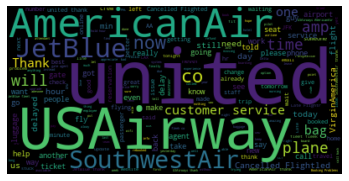

In [ ]:
# Define and update the list of stopwords
my_stop_words = STOPWORDS.update(['airline', 'airplane', 'flight', 'plane'])

# Create and generate a word cloud image
my_cloud = WordCloud(stopwords=my_stop_words).generate(long_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
plt.show()

# Tokenization

Is the process of turning a string or document into smaller chunks called **tokens**.

## NLTK Tokenization
NLTK is a standard library for tokenizing text and offers special classes for dealing with specific sources such as tweeter.
- `sent_tokenize` Splits a document into individual sentences based on `'. '` <br>
- `regexp_tokenize` allows for more control in the tokenization process with the use of regular expressions.
- `TweetTokenizer` recognizes hashtags, mentions and typicall twitter writing like the use of multiple punctions after a sentence.

### Tokenize sentences

In [ ]:
reviews.review[5]

" an absolute masterpiece: I am quite sure any of you actually taking the time to read this have played the game at least once, and heard at least a few of the tracks here. And whether you were aware of it or not, Mitsuda's music contributed greatly to the mood of every single minute of the whole game.Composed of 3 CDs and quite a few songs (I haven't an exact count), all of which are heart-rendering and impressively remarkable, this soundtrack is one I assure you you will not forget. It has everything for every listener -- from fast-paced and energetic (Dancing the Tokage or Termina Home), to slower and more haunting (Dragon God), to purely beautifully composed (Time's Scar), to even some fantastic vocals (Radical Dreamers).This is one of the best videogame soundtracks out there, and surely Mitsuda's best ever. ^_^\r\n"

In [ ]:
# tokenize the 6th review into sentences
sent5  = sent_tokenize(reviews.review[5])
print(len(sent5))

4


In [ ]:
# check the number of fullstops that exist in the review
fstops = re.findall(r'\.',reviews.review[5])
print(len(fstops))

5


As we see the number of sentences does not match with the number of full stops. This happens because some sentences do not have a space after the fullstop and the function does not identify them as seperate sentences.

### Tokenize using Regex patterns

In [ ]:
# get the tweet from the text data
air_tweet44 = text_tweets.text[43]
# Define a regex pattern to find hashtags and mentions
pattern1 = r"([@#]\w+)"
# Use the pattern on the tweet
hashtags = regexp_tokenize(air_tweet44, pattern1)
print(hashtags)

['@VirginAmerica', '#travelhelp']


### Tokenize using TweetTokenizer

In [ ]:
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in text_tweets.text]
print(all_tokens)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# get the length of each tweet
tweet_len = [len(''.join(token)) for token in all_tokens]

# Plot a histogram of the line lengths
plt.hist(tweets_len)
# Show the plot
plt.show()
# get the 10 most frequent values
pd.Series(tweet_len).value_counts()[:10]

NameError: ignored

# Preprocessing


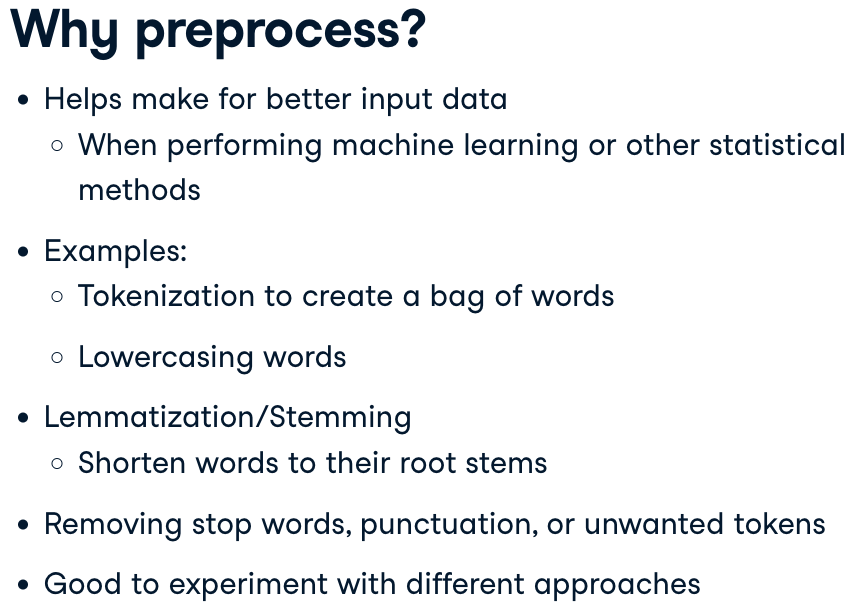

In [ ]:
Image(path+'materials/preprocess.png', height=300, width=400)

## Misc preprocessing (NLTK)

In [ ]:
# Tokenize each item in the review column 
word_tokens = [word_tokenize(review) for review in reviews.review] # use word_tokenize to transform strings into tokens
# Print out the first item of the word_tokens list
print(word_tokens[0])

# Create a list of lists, containing the tokens from list_tweets
tokens = [word_tokenize(item) for item in tweets_list]

# Remove characters and digits , i.e. retain only letters
letters = [[word for word in item if word.isalpha()] for item in tokens]
# Remove characters, i.e. retain only letters and digits
let_digits = [[word for word in item if word.isalnum()] for item in tokens]
# Remove letters and characters, retain only digits
digits = [[word for word in item if word.isdigit()] for item in tokens]

# Print the last item in each list
print('Last item in alphabetic list: ', letters[2])
print('Last item in list of alphanumerics: ', let_digits[2])
print('Last item in the list of digits: ', digits[2])


## Stopwords

Stopwords appear very frequently and are not very informative. There are some global stopwords like *and, the, a, in, but, for, at* etc and there are context based stopwords. For example in the movie reviews dataset worlds like *movie, movies, film, cinema* are consideredC stopwords.

In [ ]:
# Define the stop words using set union to get only the unique elements of A and B
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@', 'am', 'pm'])

In [ ]:
# Build and fit the vectorizers
vect1 = CountVectorizer(stop_words=my_stop_words)
vect2 = CountVectorizer(stop_words=ENGLISH_STOP_WORDS) 
vect1.fit(text_tweets.text)
vect2.fit(text_tweets.negativereason)

# Print the last 15 features from the first, and all from second vectorizer
print(vect1.get_feature_names_out()[-15:])
print(vect2.get_feature_names_out())

['zira2z3udc' 'zkatcher' 'zkoe6clgiu' 'zl4bvexmcj' 'zombie' 'zone' 'zones'
 'zoom' 'zouowgv3q6' 'zrh' 'zukes' 'zurich' 'zv6cfpohl5' 'zvfmxnuelj'
 'zzps5ywve2']
['attendant' 'bad' 'booking' 'cancelled' 'complaints' 'customer' 'damaged'
 'flight' 'issue' 'late' 'longlines' 'lost' 'luggage' 'problems' 'service'
 'tell']


## Tokenization

We can use RegEx patterns to narrow the vocabulary we want to tokenize.

In [ ]:
# Build the first vectorizer
vect1 = CountVectorizer()
vect1.fit_transform(text_tweets.text)
# Build the second vectorizer
vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]')
vect2.fit_transform(text_tweets.text)
# Print out the length of each vectorizer
print('Length of vectorizer 1: ', len(vect1.get_feature_names_out()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names_out()))

Length of vectorizer 1:  15051
Length of vectorizer 2:  643


## Stemming and Lemmatization

**Stemming** is the process of transforming words to their root forms, even if the stem is not a valid word in the language. The process usually removes suffixes such -ed, -er, -ing as well as plural and possesive forms. <br>


staying, stays, stayed ---> stay

house, housing, houses ---> hous


**Lemmatization** is the same as stemming but the root returned is a valid word in the language. Lemmatization requires the part of speech in order to work (noun, verb, adjective etc) making it slower than stemming.*italicized text*

In [ ]:
# create word tokens out of each review
review_tokens = [word_tokenize(review) for review in reviews.review[10:20]]

['The', 'Worst', 'A', 'complete', 'waste', 'of', 'time', 'Typographical', 'errors', 'poor', 'grammar', 'and', 'a', 'totally', 'pathetic', 'plot', 'add', 'up', 'to', 'absolutely', 'nothing', 'I', 'embarrassed', 'for', 'this', 'author', 'and', 'very', 'disappointed', 'I', 'actually', 'paid', 'for', 'this', 'book', 'Great', 'book', 'This', 'was', 'a', 'great', 'book', 'I', 'just', 'could', 'not', 'put', 'it', 'down', 'and', 'could', 'not', 'read', 'it', 'fast', 'enough', 'Boy', 'what', 'a', 'book', 'the', 'twist', 'and', 'turns', 'in', 'this', 'just', 'keeps', 'you', 'guessing', 'and', 'wanting', 'to', 'know', 'what', 'is', 'going', 'to', 'happen', 'next', 'This', 'book', 'makes', 'you', 'fall', 'in', 'love', 'and', 'can', 'heat', 'you', 'up', 'it', 'can', 'also', 'make', 'you', 'so', 'angery', 'this', 'book', 'can', 'make', 'you', 'go', 'throu', 'several', 'of', 'your', 'emotions', 'This', 'is', 'a', 'quick', 'read', 'romance', 'It', 'is', 'something', 'that', 'you', 'will', 'want', 'to'

In [ ]:
# instantiate an WordNetLemmatizer object
lem = WordNetLemmatizer()
# instantiate an PorterStemmer object
stemmer = PorterStemmer()

# retain only the alphabetical tokens from each review
alpha_tokens = [token for review in review_tokens for token in review if token.isalpha()]

# apply lemmatization to tokens that are only alphabetical
review_lems = [lem.lemmatize(token) for token in alpha_tokens]
# apply stemming to tokens that are only alphabetical
review_stems = [stemmer.stem(token) for token in alpha_tokens]

# print results and compare methods
print(alpha_tokens)
print(review_lems)
print(review_stems)

['The', 'Worst', 'A', 'complete', 'waste', 'of', 'time', 'Typographical', 'errors', 'poor', 'grammar', 'and', 'a', 'totally', 'pathetic', 'plot', 'add', 'up', 'to', 'absolutely', 'nothing', 'I', 'embarrassed', 'for', 'this', 'author', 'and', 'very', 'disappointed', 'I', 'actually', 'paid', 'for', 'this', 'book', 'Great', 'book', 'This', 'was', 'a', 'great', 'book', 'I', 'just', 'could', 'not', 'put', 'it', 'down', 'and', 'could', 'not', 'read', 'it', 'fast', 'enough', 'Boy', 'what', 'a', 'book', 'the', 'twist', 'and', 'turns', 'in', 'this', 'just', 'keeps', 'you', 'guessing', 'and', 'wanting', 'to', 'know', 'what', 'is', 'going', 'to', 'happen', 'next', 'This', 'book', 'makes', 'you', 'fall', 'in', 'love', 'and', 'can', 'heat', 'you', 'up', 'it', 'can', 'also', 'make', 'you', 'so', 'angery', 'this', 'book', 'can', 'make', 'you', 'go', 'throu', 'several', 'of', 'your', 'emotions', 'This', 'is', 'a', 'quick', 'read', 'romance', 'It', 'is', 'something', 'that', 'you', 'will', 'want', 'to'

### Stemming non-english languages

In [ ]:
# Select the Spanish reviews only
filtered_reviews = reviews.loc[reviews.language == 'es',:]

# Import the Spanish SnowballStemmer
SpanishStemmer = SnowballStemmer("spanish") # stemmer used for non-english languages

# Create a list of tokens
tokens = [word_tokenize(review) for review in filtered_reviews.review] 
# Stem the list of tokens
stemmed_tokens = [[SpanishStemmer.stem(word) for word in token] for token in tokens]

# Print the first item of the stemmed tokenss
print(stemmed_tokens[0])

['la', 'reencarn', 'vist', 'por', 'un', 'cientif', ':', 'el', 'prim', 'libr', 'del', 'dr.', 'weiss', 'sig', 'siend', 'un', 'gran', 'libr', 'par', 'tod', 'aquell', 'a', 'quien', 'les', 'inquiet', 'el', 'tem', 'de', 'la', 'reencarn', ',', 'asi', 'no', 'cre', 'en', 'ella', '.']


# Feature engineering

Very predictive features say something about the complexity of the text. For example, one could measure how the language of the text, long each text is, how many sentences it contains, or say something about the parts of speech involved, punctuation marks, etc. Basicly adding metadata from text as extra features.

### Feature1: Token Length

1. Tokenization

In [ ]:
# Tokenize each item in the review column 
word_tokens = [word_tokenize(review) for review in reviews.review] # use word tokenize to transform strings into tokens
# Print out the first item of the word_tokens list
print(word_tokens[0])

LookupError: ignored

The result from tokenization of reviews is a list of lists, where each item is a token from the string. Note that not only words but also punctuation marks are originally assigned as tokens.

2. Add the feature to the DF

In [ ]:
# Create an empty list to store the length of reviews
len_tokens = []
# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))
# Create a new feature for the lengh of each review
reviews['n_words'] = len_tokens 

function will return a list. Each item of the list contains a pair of a language and a number saying how likely it is that the string is in this particular language.

### Feature2: Text Language

In [ ]:
languages = [] 

# Loop over the rows of the dataset and append  
for row in range(len(reviews)):
    languages.append(detect_langs(reviews.iloc[row, 2]))

# Clean the list by splitting     
languages = [str(lang).split(':')[0][1:] for lang in languages]

# Assign the list to a new feature 
reviews['language'] = languages

print(reviews.language.value_counts())

en    9970
es      16
fr       8
de       3
cy       1
it       1
id       1
Name: language, dtype: int64


# Gensim Corpus

Gensim allows you to build corpora and token dictionaries using simple classes and functions. A corpus (or if plural, corpora) is a set of texts used to help perform natural language processing tasks.

#### Steps
1. First we should do some basic preprocessing like tokenization, lowercase, removing punctuation and stop words. (use NLTK)
2. We pass the **tokenized documents** to the Gensim Dictionary class. **This will create a mapping giving a unique id to each token.**
3. Create a BOW for each document using `doc2bow` method

To look at the tokens and their ids we use the `token2id` attribute, which is a dictionary of all of our tokens and their respective ids in our new dictionary called a Gensim corpus. 


##### **Gensim advantages**
Gensim model can be easily saved, updated and reused. Our dictionary can also be updated with new texts and extract only words that meet particular thresholds. 

In [ ]:
# Create a Gensim Dictionary from the tweets
gen_dict = Dictionary(all_tokens)
print(pd.Series(gen_dict.token2id), '\n') # .token2id gets the dictionary of tokens and their respective id

# Create a Corpus
corpus = [gen_dict.doc2bow(tweet) for tweet in all_tokens] # create a corpus with BOW for each document using .doc2bow()
# Print the first 2 documents of the corpus
print(corpus[:2], '\n')

# Select the id for "bag": bag_id
bag_id = gen_dict.token2id.get("bag") # find the id for the word bag with .token2id.get()
# Use computer_id with the dictionary to print the word 
print(f'Token id: {bag_id} corresponds to: {gen_dict.get(bag_id)}') # find the id of the token with .get()

.                               0
@VirginAmerica                  1
@dhepburn                       2
What                            3
said                            4
                            ...  
NYC-Buenos                  19843
@jlhalldc                   19844
@TilleyMonsta               19845
http://t.co/4gr39s91Dl”😂    19846
#BlackBerry10               19847
Length: 19848, dtype: int64 

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(0, 1), (1, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]] 

Token id: 564 corresponds to: bag


**Gensim Corpus and BOW**<br>
The Gensim corpus is a list of lists with each list item representing a single document. Each document is a series of tuples with the 1st item representing the token id from the Gensim dictionary and the 2nd item representing the token frequency in the document. Gensim transforms each document into a BOW using the token ids and the frequency of each token in the document.

# to do: is the result correct?
 Gensim bag-of-words 

use gensim corpus and dictionary to see the most common terms per document and across all documents.

`defaultdict` allows us to initialize a dictionary that will assign a default value to non-existent keys. By supplying the argument int, we are able to ensure that any non-existent keys are automatically assigned a default value of 0. This makes it ideal for storing the counts of words in this exercise.

`itertools.chain.from_iterable()` allows us to iterate through a set of sequences as if they were one continuous sequence. Using this function, we can easily iterate through our corpus object (which is a list of lists).`

In [ ]:
from collections import defaultdict
import itertools
# Save the fifth document: doc
doc = corpus[4]

# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(gen_dict.get(word_id), word_count)
    
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count
# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)
print(corpus[4][:10])

@VirginAmerica 1
it's 1
really 1
a 1
about 1
[(1, 1), (34, 1), (37, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1)]


# Word Vector

A word vector is multi-dimensional representation of a word or document. It is a sparse matrix with lots of sparse features (many 0s, fewer 1s). We can use the matrix to calculate similarities and relationships between words and documents by calculating the distance between them.

# Bag of words (BOW)

A bag-of-words approach describes the frequency of words within a document, or a collection of documents (called corpus). It is basicly a vocabulary of all the words occurring in the document and and their frequencies. The idea of BOW is that the more frequent a word is the more important it might be to the text.

**A downside of BOW is that we lose the word order and grammar rules and that’s why it is called a ‘bag’ of words**


In [ ]:
reviews.head()

,Unnamed: 0,score,review
0,0,1,Stuning even for the non-gamer: This sound tr...
1,1,1,The best soundtrack ever to anything.: I'm re...
2,2,1,Amazing!: This soundtrack is my favorite musi...
3,3,1,Excellent Soundtrack: I truly like this sound...
4,4,1,"Remember, Pull Your Jaw Off The Floor After H..."


## BOW (Scikit)

In [ ]:
# Build the vectorizer, specify max features 
vect = CountVectorizer(max_features=100) # create the BOW vector

# Fit the vectorizer and Transform the review column
X_review = vect.fit_transform(reviews.review)

# Create the bow representation
X_df=pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out()) 
print(X_df.head())

   about  after  all  also  am  an  and  any  are  as  ...  what  when  which  \
0      0      0    1     0   0   0    2    0    0   0  ...     0     0      0   
1      0      0    0     0   0   0    3    1    1   0  ...     0     0      0   
2      0      0    3     0   0   1    4    0    1   1  ...     0     0      1   
3      0      0    0     0   0   0    9    0    1   0  ...     0     0      0   
4      0      1    0     0   0   0    3    0    1   0  ...     0     0      0   

   who  will  with  work  would  you  your  
0    2     0     1     0      2    0     1  
1    0     0     0     0      1    1     0  
2    1     0     0     1      1    2     0  
3    0     0     0     0      0    0     0  
4    0     0     0     0      0    3     1  

[5 rows x 100 columns]


In [ ]:
X_df.sum()

about    2557
after    1272
all      3288
also     1025
am       1026
         ... 
with     5659
work     1024
would    2421
you      7051
your     1743
Length: 100, dtype: int64

**BOW output** </br>
The result is a sparse matrix. **A sparse matrix only stores entities that are non-zero**, where the rows correspond to the number of rows in the dataset, and the columns to the BOW vocabulary.

To look at the actual contents of a sparse matrix, we need to perform an additional step to transform it back to a 'dense' NumPy array, using the .`toarray()` method. We can build a pandas DataFrame from the array, where the columns' names are obtained from the `.get_feature_names_out()` method of the vectorizer. This returns a list where every entry corresponds to one feature.

## N-Grams
**N-Grams are a way of capturing context with a BOW.**
With unigrams we have single tokens, with bigrams, pairs of neighboring tokens, with trigrams: triples of neighboring tokens and so on.

**Example:** if we have the string `The weather today is wonderful`  creating n-grams will look like: <br>

- **Unigrams** : Single tokens <br> 
`{The, weather, today, is, wonderful}`<br> 
- **Bigrams** : Pairs of tokens <br>
`{The weather, weather today, today is, is wonderful}`<br>
- **Trigrams** : Triples of tokens <br>
`{The weather today, weather today is, today is wonderful}`<br>
- **N-Grams** : Sequence of n-tokens <br>

##### **Optimal n-gram sequence length and Overffiting**
If we use longer token sequence, this will result in more features which leads to more precise ML models, but also increases the risk of overfitting. In principle the length of $ bigrams=unigrams^2, trigrams=unigrams^3 $ etc. To solve this we can utilize hyperparameter tuning like Grid-Search CV.


**`CountVectorizer()` hyperparameters** </br>

- `ngram_range=(min_n_grams,max_n_grams)` specify the n-grams used. For instance, `ngram_range =(2, 2)` means we will use only bigrams, `ngram_range =(1, 2)` means we will use unigrams and bigrams etc.

- `max_features` argument considers the **features with highest term frequency**, i.e. it will pick the 1000 most frequent words across the corpus of reviews. This is a useful practise for large datasets. If it is set to None, all the words in the corpus will be included. 

- `stop_words` accepts the list of stopwords to exclude from the tokenization process.

- `token_pattern` accepts a specific regex pattern to dictate tokenization.

- `max_df` It ignores terms that appear very frequently.

- `min_df`. It ignores terms that appear rarely. The default value is 1.0, which means "ignore terms that appear in less than 1 document".

For `max_df` and `min_df`if the input is an integer its an **absolute count** if its a float its a **proportion**. (default=1.0 does not ignore any terms).

**Note:** These parameter can remove rare words, which depending on the context may or may not be a good idea.

In [ ]:
# Build the vectorizer, specify token sequence
vect = CountVectorizer(ngram_range=(1,2),
                       max_features=20000) # this uses unigrams and bigrams

# Fit and Transform the review column
X_review = vect.fit_transform(reviews.review)

# Create the bow representation
X_df = pd.DataFrame(data=X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   00  000  01  10  10 10  10 and  10 minutes  10 of  10 pages  10 stars  ...  \
0   0    0   0   0      0       0           0      0         0         0  ...   
1   0    0   0   0      0       0           0      0         0         0  ...   
2   0    0   0   0      0       0           0      0         0         0  ...   
3   0    0   0   0      0       0           0      0         0         0  ...   
4   0    0   0   0      0       0           0      0         0         0  ...   

   zen garden  zen xtra  zero  zero stars  zeta  zeta jones  ziggy  \
0           0         0     0           0     0           0      0   
1           0         0     0           0     0           0      0   
2           0         0     0           0     0           0      0   
3           0         0     0           0     0           0      0   
4           0         0     0           0     0           0      0   

   ziggy stardust  zombie  zoom  
0               0       0     0  
1               0       

In [ ]:
#Limit the size of the vocabulary to 1000 items and ignore terms which occur in more than 200 documents and in less than 50 [50,200]

# Build, fit and transform the vectorizer
vect = CountVectorizer(ngram_range=(2,2), # use only bigrams
                       min_df=50, # ignore terms that appear in less than 50 docs
                       max_df=200, # ignore terms that appear in more than 200 docs
                       max_features=1000 # use only 1000 features
                       )
X_review = vect.fit_transform(movies.review)

# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   about how  about to  according to  across the  acting and  acting was  \
0          0         0             0           0           0           0   
1          0         0             0           0           0           0   
2          0         0             0           0           0           0   
3          0         0             0           0           0           0   
4          0         0             0           0           0           0   

   actors and  actors are  after all  after watching  ...  you like  \
0           0           0          0               0  ...         0   
1           0           0          0               0  ...         0   
2           0           0          0               0  ...         0   
3           0           0          0               0  ...         0   
4           0           0          0               0  ...         0   

   you might  you see  you should  you think  you to  you ve  you watch  \
0          0        0           0        

#TF-IDF

Tf-idf means **term frequncy - inverse document frequency** and helps us identify the most important words in each document in the corpus. The goal of tf-idf is to use a weight system to assign more importance(high weight value) to words that <b> appear frequently in a document and do not appear infrequently in others, thus helping identify each particular document</b>. <br>
Common tokens like stopwords or the word *returns* in financial corpra are frequent across all documents and of no importance. Thus tf-idf assigns a low weight value.

**TFIDF advantage** <br>
Since tf-idf assigns low values to frequent words it is a more robust method against stopwords as well. Further it does a good job in assessing the relevance of results in information retrieval tasks such as search engines.

**TFIDF VS BOW** <br>
The difference is that BOW records just the frequency of each word in each document while TFIDF calculates and assigns a weight as described above.


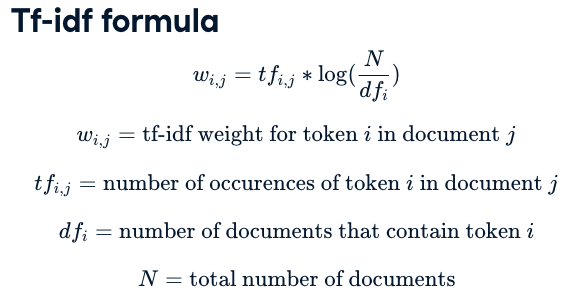

In [ ]:
Image(path+'materials/tfidf.png', width=400, height=200)

**Example**<br>
calculate the tf-idf weight for the word "computer", which appears five times in a document containing 100 words. Given a corpus containing 200 documents, with 20 documents mentioning the word "computer", tf-idf can be calculated by multiplying term frequency with inverse document frequency. 
$w = (5/100) * log(200/20)$

## Tf-idf with Gensim

In [ ]:
# Save the fifth document: doc
gen_tfidf = TfidfModel(corpus)
# get the tf-idf weights sorted by weigth value
sorted_tfidf_weights = [sorted(gen_tfidf[doc], key=lambda x:x[1], reverse=True) for doc in corpus]
#Print the weights for the first 2 documents in the Gensim corpus
sorted_tfidf_weights[:2]

In [ ]:
# Print the top 3 weighted words for the first 5 tweets
for num, doc in enumerate(sorted_tfidf_weights[:5],start=1):
  print('\n',f'Tweet{num}')
  for term_id, weight in doc[:3]:
      print(f'  {gen_dict.get(term_id)}: {round(weight,2)}')


 Tweet1
  @dhepburn: 0.8
  said: 0.37
  What: 0.36

 Tweet2
  tacky: 0.55
  commercials: 0.45
  added: 0.38

 Tweet3
  Must: 0.51
  mean: 0.38
  didn't: 0.3

 Tweet4
  blast: 0.35
  obnoxious: 0.35
  aggressive: 0.33

 Tweet5
  big: 0.47
  thing: 0.44
  bad: 0.38


## Tf-idf with Scikit

In [ ]:
# regex pattern
my_pattern = r'\b[^\d\W][^\d\W]+\b'
# Define the vectorizer and specify the arguments
vect = TfidfVectorizer(ngram_range=(1, 2),
                       max_features=100,
                       token_pattern=my_pattern,
                       stop_words=ENGLISH_STOP_WORDS)

# Fit and Transform the vectorizer
X_txt = vect.fit_transform(text_tweets.text)

# Transform to a DataFrame and specify the column names
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names_out())
X.head()

,aa,agent,airline,airport,americanair,amp,bag,baggage,bags,cancelled,...,ve,virginamerica,wait,waiting,want,way,weather,work,worst,yes
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.544485,0.531770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.407271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.537247,0.0,0.0,0.0,0.0,...,0.000000,0.559828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.663756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# BOW vs Tf-idf

In [ ]:
# Build a BOW and tfidf vectorizers from the review column and with max of 100 features
bow_vect = CountVectorizer(max_features=100)
tfidf_vect = TfidfVectorizer(max_features=100)

# Transform the vectorizers
bow = bow_vect.fit_transform(reviews.review)
tfidf = tfidf_vect.fit_transform(reviews.review)
# Create DataFrames from the vectorizers 
bow_df = pd.DataFrame(bow.toarray(), columns=bow_vect.get_feature_names_out())
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())

In [ ]:
bow_df.head()

,about,after,all,also,am,an,and,any,are,as,...,what,when,which,who,will,with,work,would,you,your
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,2,0,1,0,2,0,1
1,0,0,0,0,0,0,3,1,1,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,3,0,0,1,4,0,1,1,...,0,0,1,1,0,0,1,1,2,0
3,0,0,0,0,0,0,9,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,3,0,1,0,...,0,0,0,0,0,0,0,0,3,1


In [ ]:
tfidf_df.head()

,about,after,all,also,am,an,and,any,are,as,...,what,when,which,who,will,with,work,would,you,your
0,0.0,0.000000,0.138970,0.0,0.0,0.00000,0.140823,0.000000,0.000000,0.000000,...,0.0,0.0,0.00000,0.351952,0.0,0.113371,0.000000,0.306757,0.000000,0.175024
1,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.191572,0.175388,0.116940,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.139101,0.106279,0.000000
2,0.0,0.000000,0.285009,0.0,0.0,0.10526,0.192539,0.000000,0.088148,0.090385,...,0.0,0.0,0.13013,0.120301,0.0,0.000000,0.139218,0.104853,0.160223,0.000000
3,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.554705,0.000000,0.112868,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.174214,0.000000,0.0,0.0,0.00000,0.197188,0.000000,0.120369,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.328184,0.163385


# Named Entity Recoginition (NER)

Named Entity Recognition or NER for short is a natural language processing task used to identify important named entities in the text -- such as people, places and organizations -- they can even be dates, states, works of art and other categories depending on the libraries and notation you use. NER can be used alongside topic identification, or on its own to determine important items in a text or answer basic natural language understanding questions such as who? what? when and where?

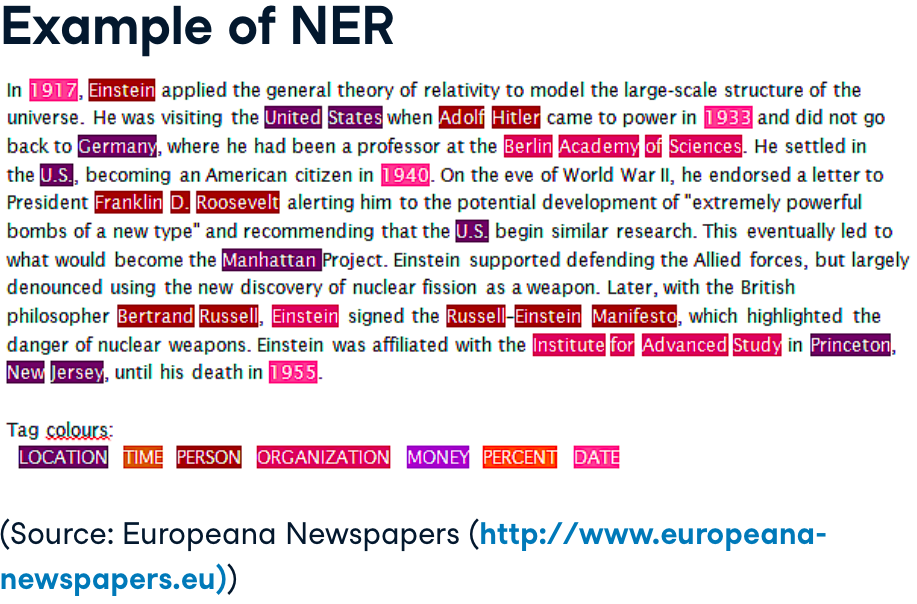

In [ ]:
Image(path+"materials/ner.png", width=600, height=400)

## NER with NLTK

1. Tokenize
2. Tag the text for parts of speech
3. Pass the tagged sentence to a `nltk.ne_chunk()`

**Tagging** adds tags for proper nouns, pronouns, adjective, verbs and other part of speech that NLTK uses based on an english grammar.

**Named entity chunk** returns the sentence as a tree. This tree shows the named entities tagged as their own chunks such as GPE or geopolitical entity for New York, or MOMA and Metro as organizations. It does so without consulting a knowledge base, like wikipedia, but instead uses trained statistical and grammatical parsers.


In [ ]:
# Tokenize each word in reviews
token_words = [word_tokenize(review) for review in reviews.review[:10]]

# Tag each tokenized word into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(word) for word in token_words] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences,binary=True)

In [ ]:
# print 3th review
reviews.review[2]

' Amazing!: This soundtrack is my favorite music of all time, hands down. The intense sadness of "Prisoners of Fate" (which means all the more if you\'ve played the game) and the hope in "A Distant Promise" and "Girl who Stole the Star" have been an important inspiration to me personally throughout my teen years. The higher energy tracks like "Chrono Cross ~ Time\'s Scar~", "Time of the Dreamwatch", and "Chronomantique" (indefinably remeniscent of Chrono Trigger) are all absolutely superb as well.This soundtrack is amazing music, probably the best of this composer\'s work (I haven\'t heard the Xenogears soundtrack, so I can\'t say for sure), and even if you\'ve never played the game, it would be worth twice the price to buy it.I wish I could give it 6 stars.\r\n'

In [ ]:
# Test for stems of the tree with 'NE' tags
for num, sent in enumerate(chunked_sentences,start=1):
    print(f'Review{num}')
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

## NER with SpaCy

SpaCy is a library for NLP similar to Gensim but more focused on fast implementation of NLP pipelines to generate models and corpra. SpaCy's NER is different from NLTK's. It includes informal language and has different labels as well (NORP, CARDINAL, MONEY, WORKOFART, LANGUAGE, EVENT)

In [ ]:
# Instantiate the English model: nlp
nlp = spacy.load('en') # loads pretrained vectors for the english language
# Use this for faster runtimes
#nlp = spacy.load('en',tagger=False,parser=False,matcher=False)
# entity attribute is used to perform NER in the loaded text
nlp.entity 

In [ ]:
# load documents in SpaCy
docs = [nlp(review) for review in reviews.review]
type(nlp(reviews.review[1]))

spacy.tokens.doc.Doc

In [ ]:
doc2 = docs[1]
# print named entities for 2nd doc
print(doc2.ents)
# print the 1st entity and the label given by SpaCy's NER
print(f'entity: {doc2.ents[0]}, label: {doc2.ents[0].label_}')

(Yasunori Mitsuda's, years)
entity: Yasunori Mitsuda's, label: PERSON


In [ ]:
# Print all of the found entities and their labels in the first 10 reviews
for num, doc in enumerate(docs[:10],start=1):
  print('\n',f'Review{num}')
  for ent in doc.ents:
    print(ent.label_, ent.text)


 Review1
ORG Chrono Cross

 Review2
PERSON Yasunori Mitsuda's
DATE years

 Review3
WORK_OF_ART Prisoners of Fate
WORK_OF_ART A Distant Promise
WORK_OF_ART Girl who Stole the Star
ORG Chrono Cross
ORG Time
WORK_OF_ART "Time of the Dreamwatch"
WORK_OF_ART Chronomantique
ORG Chrono Trigger
PRODUCT Xenogears
CARDINAL 6

 Review4
WORK_OF_ART Scars Of Time
WORK_OF_ART Between Life and Death, Forest Of Illusion
LOC Drowned Valley
CARDINAL Two
ORG Galdorb - Home
NORP Chronomantique
ORG Fate, Gale
ORG ZelbessDisk Three:
CARDINAL three
PERSON Chronopolis
GPE Fates
NORP Jellyfish
ORG Burning Orphange
GPE Dragon
ORG Xander Cross


 Review5
ORG Chrono Cross
ORG Time
WORK_OF_ART Stars
LOC Sea
PERSON Unstolen Jewel
PERSON Yasunori Mitsuda

 Review6
CARDINAL at least a few
PERSON Mitsuda
TIME every single minute
CARDINAL 3
ORG Termina Home
ORG Time
ORG Mitsuda

 Review7
ORG Buyer
CARDINAL 5
PERSON Haddon
TIME an evening
ORG Amazon
ORDINAL 8th
WORK_OF_ART To Kill a Mockingbird"--a book I am quite sure

# Sentiment Analysis

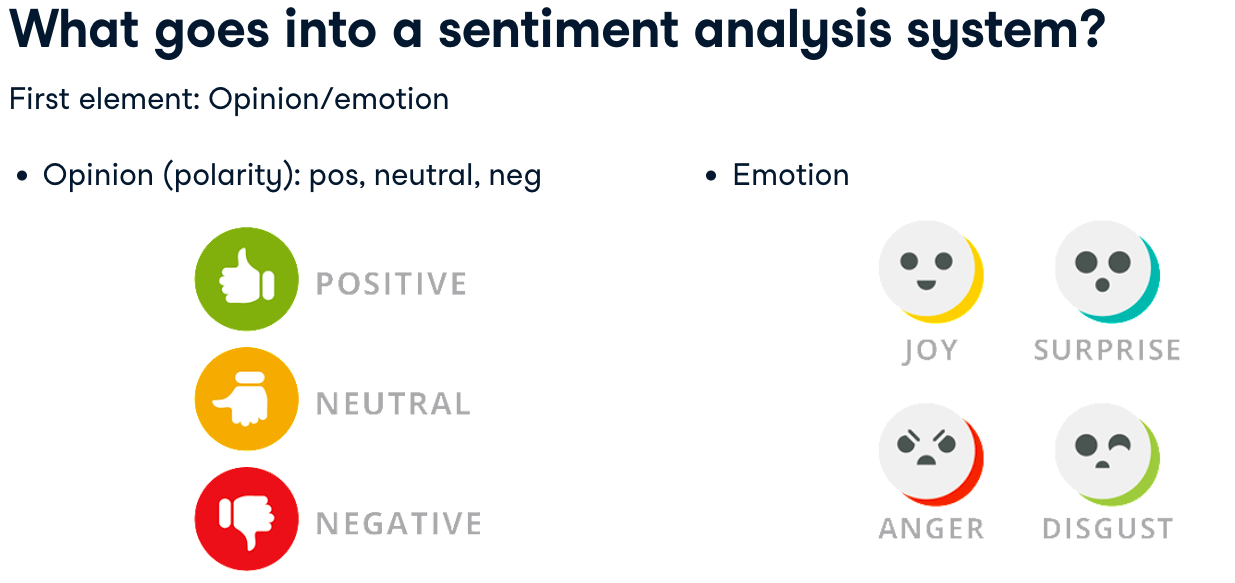

In [117]:
Image(path+'materials/sentiment_analysis_1.png', height=250, width=500)

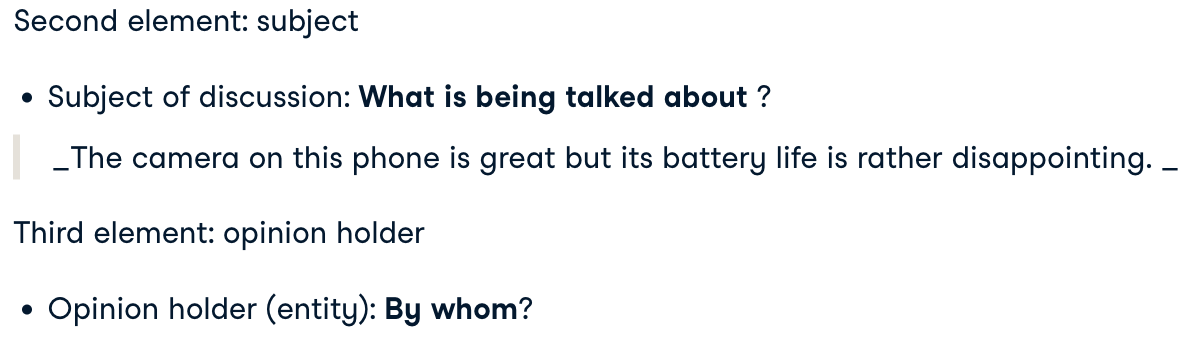

In [116]:
Image(path+'materials/sentiment_analysis_2.png', height=200, width=500)

Sentiment analysis tasks can be carried out at different levels of granularity. First is **document level**. This is when we look at the whole review of a product, for example. Second is the **sentence level**. This refers to determining whether the opinion expressed in each sentence is positive, negative, or neutral. The last level of granularity is the **aspect level**. The aspect refers to expressing opinions about different features of a product.<br>
Imagine a sentence such as `"The camera in this phone is pretty good but the battery life is disappointing."` It expresses both positive and negative opinions about a phone and we might want to be able to say which features of the product clients like and which they don't.

####**Types of sentiment analysis algorithms**
The algorithms used for sentiment analysis could be split into 2 main categories:
- **Rule or lexicon based**. Such methods most commonly have a predefined list of words with a valence score. For example, nice could be +2, good +1, terrible -3, and so on. The algorithm then matches the words from the lexicon to the words in the text and either sums or averages the scores in some way.<br>
As an example, let's take the sentence, `'Today was a good day.'` Each word gets a score, and to get the total valence we sum the words. In this case, we have a positive sentence. <br>
- **Automated systems, ML based**. The task is usually modeled as a classification problem where using some historical data with known sentiment, we need to predict the sentiment of a new piece of text.

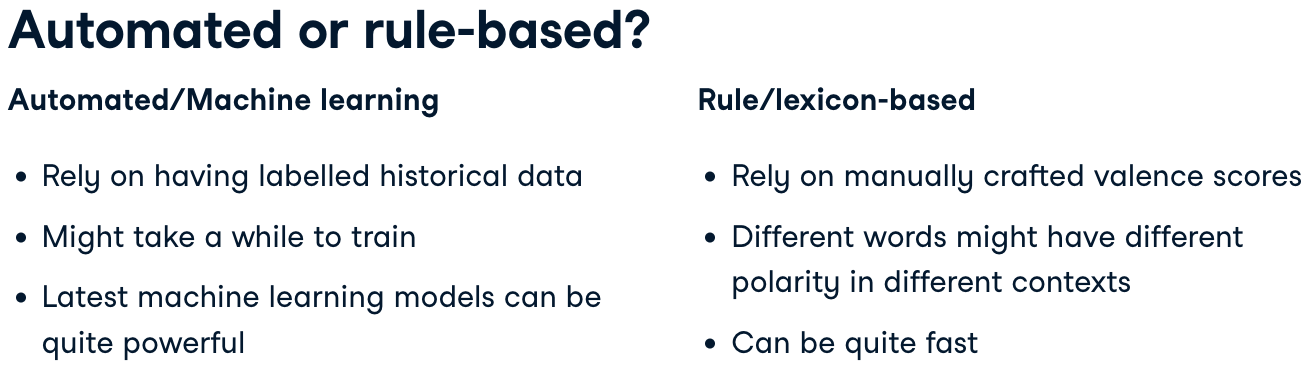

In [120]:
Image(path+'materials/ml_vs_rule_sentiment.png', height=200, width=600)

## Sentiment identification (TextBlob)
The `TextBlob(`text`).sentiment` attribute returns a tuple:
- **polarity** is measured on the scale from [-1.0 to 1.0], where -1.0 is very negative, 0 is neutral and +1.0 is very positive. Our example 'Today was a good day' carries positive emotion and thus will have a positive polarity score: 0.7.
- **subjectivity** is measured from [0.0 to 1.0] where 0.0 is very objective and 1.0 is very subjective. So our example is rather positive and subjective.

In [99]:
text = 'Today was a good day'
my_valence = TextBlob(text)
my_valence.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

# ML for Sentiment Prediction

Logistic regression, SVMs and MultinomialNB are good model choices for text classification problems.

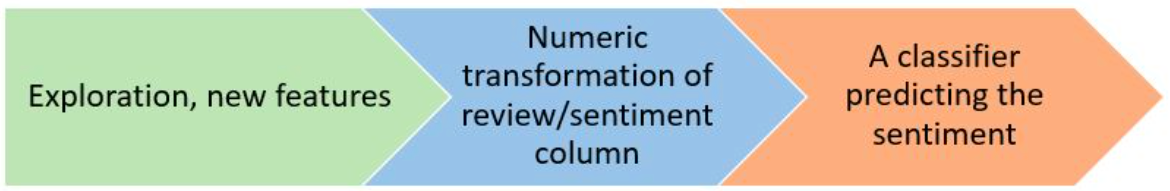

In [17]:
Image(path+'materials/analysis_process.png', height=100, width=500)

In [56]:
positive_reviews = reviews.loc[reviews.score==1,'review']
# concat all strings in the Series into a single string
positive_reviews_str = positive_reviews.str.cat(sep=' ')

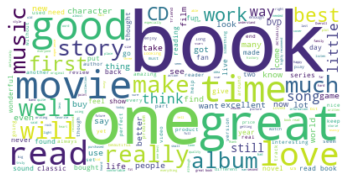

In [57]:
# Exploration, New features
# Create and generate a word cloud image
cloud_positives = WordCloud(background_color='white').generate(positive_reviews_str)
# Display the generated wordcloud image
plt.imshow(cloud_positives, interpolation='bilinear') 
plt.axis("off")
# Don't forget to show the final image
plt.show()

# Tokenize each item in the review column
word_tokens = [word_tokenize(review) for review in reviews.review]
# Create an empty list to store the length of the reviews
len_tokens = []
# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))
# Create a new feature for the lengh of each review
reviews['n_words'] = len_tokens 

In [75]:
# Numeric Transformation (Vectors)
# Build the Tfidf vectorizer
tfidf_vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,
                       ngram_range=(1, 2),
                       max_features=200,
                       token_pattern=r'\b[^\d\W][^\d\W]+\b')
# Create sparse matrix from the vectorizer
X = tfidf_vect.fit_transform(reviews.review)
# Create a DataFrame
reviews_transformed = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())
reviews_transformed = reviews_transformed.join(reviews[['score','n_words']])
reviews_transformed.head()

,able,action,actually,ago,album,amazing,amazon,author,away,bad,...,world,worst,worth,writing,written,wrong,year,years,score,n_words
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.274041,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1,87
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.219408,0.0,0.0,0.0,0.0,0.208885,1,109
2,0.0,0.0,0.0,0.0,0.0,0.382773,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.160089,0.0,0.0,0.0,0.0,0.152410,1,165
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1,145
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1,109


In [76]:
# ML part
# Define X and y
y = reviews_transformed.score
X = reviews_transformed.drop('score', axis=1)
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

In [70]:
# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)
# Predict the labels
lr_predicted = log_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy on the test set:0.788 



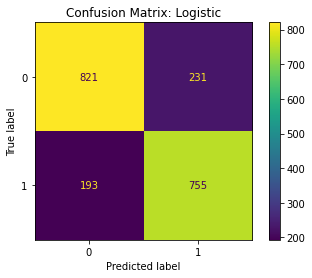

In [78]:
# Print accuracy score and confusion matrix on test set
lr_accuracy = accuracy_score(y_test, lr_predicted)
print(f'Accuracy on the test set:{lr_accuracy}', '\n')
conf_matrix = confusion_matrix(y_test, lr_predicted)
confusion_matrix_dis = ConfusionMatrixDisplay(conf_matrix, )
confusion_matrix_dis.plot()
plt.title('Confusion Matrix: Logistic')
plt.show()

If our problem does not have a threshold of .50 then using the probabilities output of logistic regression is the way to go. For example a categorization of spam/non-spam with a threshold=.50 would be useless beacause the natural level would be around 10-90%.

In [72]:
# Predict the probability of the 0 class
prob_0 = log_reg.predict_proba(X_test)[:, 0]
# Predict the probability of the 1 class
prob_1 = log_reg.predict_proba(X_test)[:, 1]
print(f"First 10 predicted probabilities of class 0:{prob_0[:10]}", '\n')
print(f"First 10 predicted probabilities of class 1:{prob_1[:10]}")

First 10 predicted probabilities of class 0:[0.02464407 0.3727004  0.38097874 0.97195244 0.34578527 0.270955
 0.56079413 0.88397885 0.69472663 0.1578743 ] 

First 10 predicted probabilities of class 1:[0.97535593 0.6272996  0.61902126 0.02804756 0.65421473 0.729045
 0.43920587 0.11602115 0.30527337 0.8421257 ]


## MultinomialNB

A Naive Bayes model is commonly used for testing NLP classification problems because of its basis in probability. Naive bayes algorithm uses probability, attempting to answer the question if given a particular piece of data, how likely is a particular outcome? For example, thinking back to our movie genres dataset -- If the plot has a spaceship, how likely is it that the movie is Sci-Fi?

**Multinomial NB expects integers as inputs so it works well with scikit's `CountVectorizer` but not with Tf-idf models**

In [73]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()
# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)
# Create the predicted tags: pred
nb_pred = nb_classifier.predict(X_test)

Accuracy on the test set:0.776 



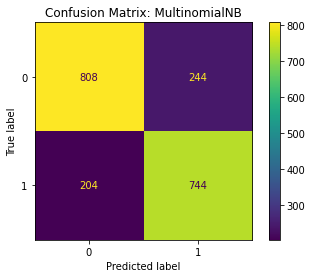

In [74]:
# Accuracy
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f'Accuracy on the test set:{nb_accuracy}', '\n')
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, nb_pred)
confusion_matrix_dis = ConfusionMatrixDisplay(conf_matrix, )
confusion_matrix_dis.plot()
plt.title('Confusion Matrix: MultinomialNB')
plt.show()